# A quick example

In [45]:
# from IPython.display import Image
from community_simulator import *
from community_simulator.usertools import *
from community_simulator.visualization import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends import backend_pdf as bpdf
colors = sns.color_palette()
%matplotlib inline

In [46]:
## Set the assumptions (used to generate differential equations)

# Start with initial assumptions
assumptions=a_default.copy() #Start with default parameters
assumptions

{'sampling': 'Binary',
 'SA': array([60., 60., 60.]),
 'MA': array([30., 30., 30.]),
 'Sgen': 30,
 'muc': 10,
 'sigc': 3,
 'q': 0.0,
 'c0': 0.0,
 'c1': 1.0,
 'fs': 0.45,
 'fw': 0.45,
 'sparsity': 0.2,
 'n_wells': 10,
 'S': 100,
 'food': 0,
 'R0_food': 1000,
 'regulation': 'independent',
 'response': 'type I',
 'supply': 'off'}

In [47]:
#assumptions['n_wells'] = 30 # "Wells" are sites
#assumptions['SA'] = [5., 5., 5.] # "SA" is the number of species per family (?)
#assumptions['Sgen'] = 5 # Also include 5 generalist species
#assumptions['S'] = 5 # Initial number of species per well

assumptions['n_wells'] = 100 #Add more wells
assumptions['l'] = 0.8 #Assign a high leakage fraction to allow for a lot of crossfeeding

R0_food = np.linspace(30,300,assumptions['n_wells']) #Make a gradient of food supply levels
assumptions['R0_food'] = 330 - R0_food
assumptions['R0_food']

array([300.        , 297.27272727, 294.54545455, 291.81818182,
       289.09090909, 286.36363636, 283.63636364, 280.90909091,
       278.18181818, 275.45454545, 272.72727273, 270.        ,
       267.27272727, 264.54545455, 261.81818182, 259.09090909,
       256.36363636, 253.63636364, 250.90909091, 248.18181818,
       245.45454545, 242.72727273, 240.        , 237.27272727,
       234.54545455, 231.81818182, 229.09090909, 226.36363636,
       223.63636364, 220.90909091, 218.18181818, 215.45454545,
       212.72727273, 210.        , 207.27272727, 204.54545455,
       201.81818182, 199.09090909, 196.36363636, 193.63636364,
       190.90909091, 188.18181818, 185.45454545, 182.72727273,
       180.        , 177.27272727, 174.54545455, 171.81818182,
       169.09090909, 166.36363636, 163.63636364, 160.90909091,
       158.18181818, 155.45454545, 152.72727273, 150.        ,
       147.27272727, 144.54545455, 141.81818182, 139.09090909,
       136.36363636, 133.63636364, 130.90909091, 128.18

In [48]:
init_state = MakeInitialState(assumptions)
init_state
# inital states have 2 dataframes.
# 1: n_wells x n_species, initial levels of each species (scaled)
# 2: n_wells x n_resources, initial levels of resources

(           W0   W1   W2   W3   W4   W5   W6   W7   W8   W9 ...   W90  W91  \
 F0  S0    0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0 ...   0.0  0.0   
     S1    1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0 ...   1.0  1.0   
     S2    1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0 ...   1.0  0.0   
     S3    0.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0 ...   1.0  0.0   
     S4    0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0 ...   0.0  1.0   
     S5    0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0 ...   0.0  0.0   
     S6    1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0 ...   1.0  1.0   
     S7    1.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0 ...   0.0  1.0   
     S8    1.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0 ...   1.0  1.0   
     S9    1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0 ...   1.0  1.0   
     S10   1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0 ...   1.0  0.0   
     S11   0.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0 ... 

In [49]:
# Now we set up community dynamics rules. This one is a little opaque to me.

# Make dynamics
def dNdt(N,R,params):
    return MakeConsumerDynamics(assumptions)(N,R,params)

def dRdt(N,R,params):
    return MakeResourceDynamics(assumptions)(N,R,params)
dynamics = [dNdt,dRdt]

# Now we set up assumptions

params = MakeParams(assumptions)
params

[{'c':            T0                                              ...    T2       \
             R0   R1   R2   R3   R4   R5   R6   R7   R8   R9 ...   R80  R81   
  F0  S0    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
      S1    0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0 ...   1.0  0.0   
      S2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
      S3    0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
      S4    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
      S5    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   1.0  0.0   
      S6    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0  0.0   
      S7    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
      S8    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
      S9    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
      S10   0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [50]:
plate1 = Community(init_state, dynamics,params, parallel = False)
plate1

In [51]:
plate1.Propagate(1)
plate1.SteadyState()
#Find steady state

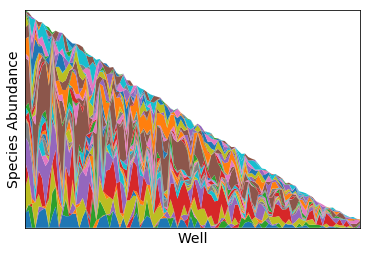

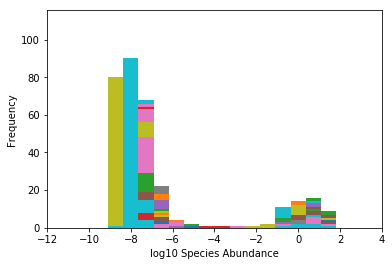

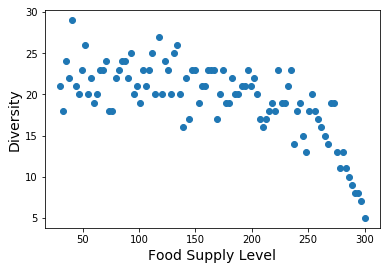

In [52]:
#Plot community compositions
fig,ax=plt.subplots()
StackPlot(plate1.N,ax=ax)
ax.set_xlabel('Well',fontsize=14)
ax.set_ylabel('Species Abundance',fontsize=14)
plt.show()

#Make histogram of all population sizes
fig,ax=plt.subplots()
np.log10(plate1.N+1e-20).plot.hist(ax=ax,bins=30,legend=False)
ax.set_xlim((-12,4))
ax.set_xlabel('log10 Species Abundance')
plt.show()

#Plot diversity
fig,ax=plt.subplots()
ax.scatter(R0_food,(plate1.N>1e-4).sum().values)
ax.set_xlabel('Food Supply Level',fontsize=14)
ax.set_ylabel('Diversity',fontsize=14)
plt.show()